In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import shutil
from datetime import datetime

In [2]:
api_url_data = 'https://api.covid19india.org/data.json'
r_data = requests.get(api_url_data)
data_time_series = r_data.json()

In [3]:
data_time_series.keys()

dict_keys(['cases_time_series', 'statewise', 'tested'])

In [4]:
state_data = data_time_series.get('statewise')

In [5]:
state_list = []
confirmed_list = []
recovered_list = []
deaths_list = []
lastupdatedtime_list = []

for j in range(len(state_data)):
    confirmed = state_data[j].get('confirmed')        
    recovered = state_data[j].get('recovered')
    deaths = state_data[j].get('deaths')
    state = state_data[j].get('state')
    lastupdatedtime = state_data[j].get('lastupdatedtime')
    lastupdatedtime = lastupdatedtime[:-9]
    
    if confirmed != '0':
        confirmed_list.append(confirmed)
        recovered_list.append(recovered)
        deaths_list.append(deaths)
        state_list.append(state)
        lastupdatedtime_list.append(lastupdatedtime)

In [6]:
confirmed_list = np.array(confirmed_list, dtype = int)
recovered_list = np.array(recovered_list, dtype = int)
deaths_list = np.array(deaths_list, dtype = int)

active = np.subtract(confirmed_list, np.add(recovered_list, deaths_list))
death_rate = np.divide(deaths_list, confirmed_list)*100
recovery_rate = np.divide(recovered_list, confirmed_list)*100

death_rate_list = []
recovery_rate_list = []

for s in death_rate:
    s = round(s,1)
    death_rate_list = np.append(death_rate_list, s)
for p in recovery_rate:
    p = round(p,1)
    recovery_rate_list = np.append(recovery_rate_list, p)

In [7]:
total_data = {'Confirmed':confirmed_list[0], 'Active':active[0], 'Recovered':recovered_list[0], 'Deaths':deaths_list[0], 'Recovery Rate(%)':recovery_rate_list[0], 'Death Rate(%)':death_rate_list[0]}
df_total_data = pd.DataFrame(total_data, index=[0])
df_total_data.to_csv('total_data.csv')
df_total_data.to_html('total_data.html', border=7, justify = 'center', index=False)
df_total_data

,Confirmed,Active,Recovered,Deaths,Recovery Rate(%),Death Rate(%)
0,4298,3852,328,118,7.6,2.7


In [8]:
state_data = {'States':state_list[1:], 'Confirmed':confirmed_list[1:], 'Active':active[1:], 'Recovered':recovered_list[1:], 'Deaths':deaths_list[1:], 'Recovery Rate(%)':recovery_rate_list[1:], 'Death Rate(%)':death_rate_list[1:], 'Last Updated':lastupdatedtime_list[1:]}
df_state_data = pd.DataFrame(state_data)
df_state_data.to_csv('State_data.csv')
df_state_data.to_html('State_data.html', border=3, justify = 'center', index=False)
df_state_data

,States,Confirmed,Active,Recovered,Deaths,Recovery Rate(%),Death Rate(%),Last Updated
0,Maharashtra,748,647,56,45,7.5,6.0,05/04/2020
1,Tamil Nadu,571,558,8,5,1.4,0.9,05/04/2020
2,Delhi,503,480,16,7,3.2,1.4,05/04/2020
3,Kerala,314,256,56,2,17.8,0.6,05/04/2020
4,Telangana,334,290,33,11,9.9,3.3,05/04/2020
5,Uttar Pradesh,278,254,21,3,7.6,1.1,05/04/2020
6,Rajasthan,274,248,25,1,9.1,0.4,06/04/2020
7,Andhra Pradesh,252,246,5,1,2.0,0.4,05/04/2020
8,Madhya Pradesh,193,177,3,13,1.6,6.7,05/04/2020
9,Karnataka,151,136,11,4,7.3,2.6,05/04/2020


# Case Time Plot:

In [9]:
time = data_time_series.get('cases_time_series')

In [10]:
date_list = []
dailyconfirmed_list = []
dailydeceased_list = []
dailyrecovered_list = []

totalconfirmed_list = []
totaldeceased_list = []
totalrecovered_list = []

for t in range(len(time)):
    
    date = time[t].get('date')
    date_list.append(date)
    
    dailyconfirmed = time[t].get('dailyconfirmed')
    dailyconfirmed_list.append(dailyconfirmed)
    
    dailydeceased = time[t].get('dailydeceased')
    dailydeceased_list.append(dailydeceased)
    
    dailyrecovered = time[t].get('dailyrecovered')
    dailyrecovered_list.append(dailyrecovered)
    
    totalconfirmed = time[t].get('totalconfirmed')
    totalconfirmed_list.append(totalconfirmed)
    
    totalrecovered = time[t].get('totalrecovered')
    totalrecovered_list.append(totalrecovered)
    
    totaldeceased = time[t].get('totaldeceased')
    totaldeceased_list.append(totaldeceased)

In [11]:
totalconfirmed_list = np.array(totalconfirmed_list, dtype=int)
totalrecovered_list = np.array(totalrecovered_list, dtype=int)
totaldeceased_list = np.array(totaldeceased_list, dtype=int)

dailyconfirmed_list = np.array(dailyconfirmed_list, dtype=int)
dailyrecovered_list = np.array(dailyrecovered_list, dtype=int)
dailydeceased_list = np.array(dailydeceased_list, dtype=int)

In [12]:
day_range = 14

daily_data = {'Date':date_list[-day_range:], 'Daily Confirmations':dailyconfirmed_list[-day_range:], 'Daily Recoveries':dailyrecovered_list[-day_range:], 'Daily Deaths':dailydeceased_list[-day_range:], 'Total Confirmations':totalconfirmed_list[-day_range:], 'Total Recoveries':totalrecovered_list[-day_range:], 'Total Deaths':totaldeceased_list[-day_range:]}
df_daily_data = pd.DataFrame(daily_data)
df_daily_data.to_csv('daily_data.csv')
df_daily_data.to_html('daily_data.html', border=3, justify = 'center', index=False)
df_daily_data

,Date,Daily Confirmations,Daily Recoveries,Daily Deaths,Total Confirmations,Total Recoveries,Total Deaths
0,23 March,94,2,2,497,25,9
1,24 March,74,15,1,571,40,10
2,25 March,86,3,1,657,43,11
3,26 March,73,7,5,730,50,16
4,27 March,153,25,3,883,75,19
5,28 March,141,10,5,1024,85,24
6,29 March,115,17,3,1139,102,27
7,30 March,190,35,16,1329,137,43
8,31 March,306,13,6,1635,150,49
9,01 April,424,19,7,2059,169,56


In [13]:
date_list_splitted = []
for i in date_list:
    date_splitted = i[0:2]
    date_list_splitted.append(date_splitted)

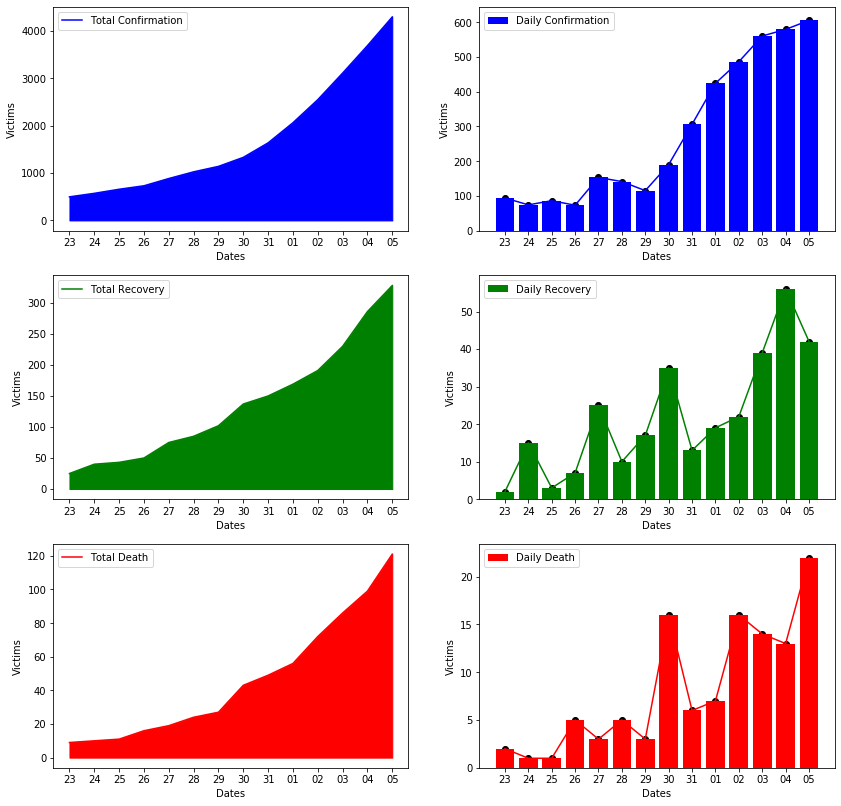

In [14]:
day_range = 14

plt.figure(figsize=(14,14))

plt.subplot(3,2,1)
plt.plot(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='blue', label='Total Confirmation')
# plt.scatter(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='blue')
plt.xlabel('Dates')
plt.ylabel('Victims')
plt.legend()

plt.subplot(3,2,2)
plt.bar(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='blue', label='Daily Confirmation')
plt.plot(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='blue')
plt.scatter(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailyconfirmed_list[-day_range:], color='blue')
plt.xlabel('Dates')
plt.ylabel('Victims')
plt.legend()

plt.subplot(3,2,3)
plt.plot(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='green', label='Total Recovery')
# plt.scatter(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='green')
plt.xlabel('Dates')
plt.ylabel('Victims')
plt.legend()

plt.subplot(3,2,4)
plt.bar(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='green', label='Daily Recovery')
plt.plot(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='green')
plt.scatter(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailyrecovered_list[-day_range:], color='green')
plt.xlabel('Dates')
plt.ylabel('Victims')
plt.legend()

plt.subplot(3,2,5)
plt.plot(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='red', label='Total Death')
# plt.scatter(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='red')
plt.xlabel('Dates')
plt.ylabel('Victims')
plt.legend()

plt.subplot(3,2,6)
plt.bar(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='red', label='Daily Death')
plt.plot(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='red')
plt.scatter(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailydeceased_list[-day_range:], color='black')
plt.xlabel('Dates')
plt.ylabel('Victims')
plt.legend()

plt.savefig('plot1.png')

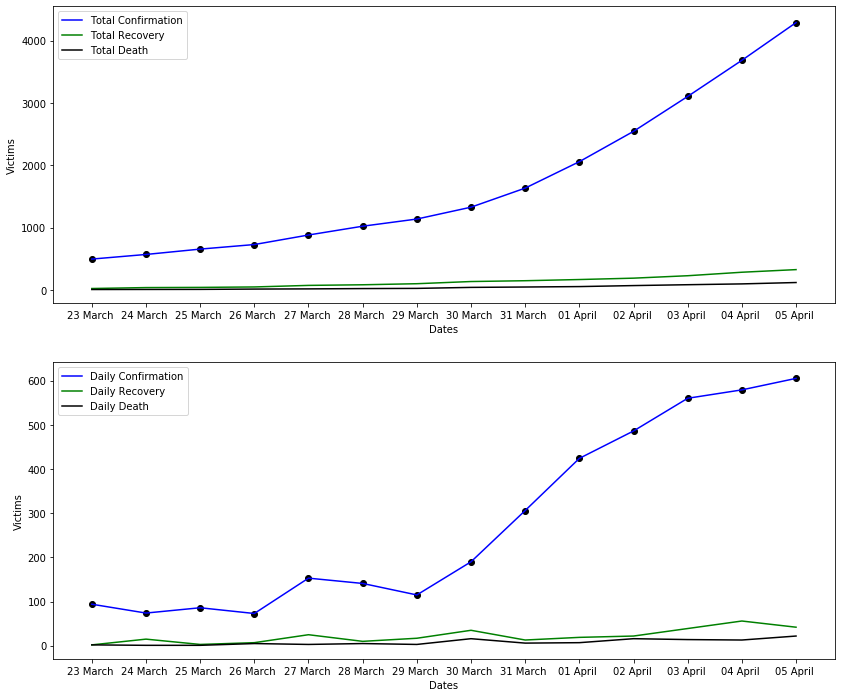

In [15]:
day_range = 14

plt.figure(figsize=(14,12))

plt.subplot(2,1,1)
plt.plot(date_list[-day_range:], totalconfirmed_list[-day_range:], color='blue', label='Total Confirmation')
plt.scatter(date_list[-day_range:], totalconfirmed_list[-day_range:], color='black')
plt.plot(date_list[-day_range:], totalrecovered_list[-day_range:], color='green', label='Total Recovery')
plt.plot(date_list[-day_range:], totaldeceased_list[-day_range:], color='black', label='Total Death')
plt.xlabel('Dates')
plt.ylabel('Victims')
plt.legend()

plt.subplot(2,1,2)
plt.plot(date_list[-day_range:], dailyconfirmed_list[-day_range:], color='blue', label='Daily Confirmation')
plt.scatter(date_list[-day_range:], dailyconfirmed_list[-day_range:], color='black')
plt.plot(date_list[-day_range:], dailyrecovered_list[-day_range:], color='green', label='Daily Recovery')
plt.plot(date_list[-day_range:], dailydeceased_list[-day_range:], color='black', label='Daily Death')
plt.xlabel('Dates')
plt.ylabel('Victims')
plt.legend()

plt.savefig('plot2.png')

# ICMR Reports

In [16]:
tested = data_time_series.get('tested')

In [17]:
report_date_list = []
totalsamplestested_list = []
totalpositivecases_list = []
totalindividualstested_list = []
source_list = []

for i in range(len(tested)):
    report_date = tested[i].get('updatetimestamp')
    report_date = report_date[0:9]
    
    totalsamplestested = tested[i].get('totalsamplestested')
    totalpositivecases = tested[i].get('totalpositivecases')
    totalindividualstested = tested[i].get('totalindividualstested')
    source = tested[i].get('source')
    
    if report_date != '' and totalsamplestested != '' and totalpositivecases != '':
        report_date_list.append(report_date)
        totalsamplestested_list.append(totalsamplestested)
        totalpositivecases_list.append(totalpositivecases)
        totalindividualstested_list.append(totalindividualstested)
        source_list.append(source)

In [18]:
totalsamplestested_list[-1] = 89534

In [19]:
totalsamplestested_list = np.array(totalsamplestested_list, dtype=int)
totalpositivecases_list = np.array(totalpositivecases_list, dtype=int)

In [20]:
reports = {"Date":report_date_list, "Total Sample Tested":totalsamplestested_list, "Total Positive Cases":totalpositivecases_list}
df_reports = pd.DataFrame(reports)
df_reports.to_csv('ICMR_report_data.csv')
df_reports.to_html('ICMR_report_data.html', border=3, index=False, justify = 'center')
df_reports

,Date,Total Sample Tested,Total Positive Cases
0,13/3/2020,6500,78
1,18/3/2020,13125,150
2,19/3/2020,13316,168
3,19/3/2020,14175,182
4,20/3/2020,14376,206
5,20/3/2020,15404,236
6,21/3/2020,15701,271
7,21/3/2020,16911,315
8,22/3/2020,16999,341
9,22/3/2020,18127,396


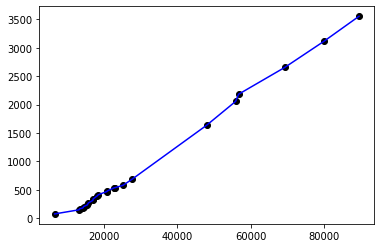

In [21]:
plt.scatter(totalsamplestested_list, totalpositivecases_list, color='black')
plt.plot(totalsamplestested_list, totalpositivecases_list, color='blue')

# State Total

In [22]:
api_url_state = 'https://api.covid19india.org/v2/state_district_wise.json'
r_state = requests.get(api_url_state)
data_state = r_state.json()

In [23]:
districtData = data_state[16].get('districtData')

In [24]:
district_list = []
confirmed_list_dist = []

for z in range(len(districtData)):
    district = districtData[z].get('district')
    district_list.append(district)
    confirmed = districtData[z].get('confirmed')
    confirmed_list_dist.append(confirmed)

In [25]:
confirmed_list_dist = np.array(confirmed_list_dist, dtype=int)

In [26]:
district_list[-1] = 'Others'

In [27]:
if sum(confirmed_list_dist) == confirmed_list[15]:
    print('$GO AHEAD$')
else:
    for i in range(10):
        print('stop')
        print('Careful')

$GO AHEAD$


In [28]:
dist_data = {'Districts':district_list, 'Confirmed':confirmed_list_dist}
df_dist_data = pd.DataFrame(dist_data)
df_dist_data.to_csv('dist_data.csv')
df_dist_data.to_html('wb_data.html', border=7, index=False, justify = 'center')
df_dist_data

,Districts,Confirmed
0,Kolkata,11
1,North 24 Parganas,4
2,Nadia,5
3,Medinipur East,3
4,Kalimpong,1
5,Hooghly,1
6,Howrah,1
7,South 24 Parganas,1
8,Others,53


# State Daily

In [29]:
api_url_states_daily = 'https://api.covid19india.org/states_daily.json'
r_states_daily = requests.get(api_url_states_daily)
data_states_daily = r_states_daily.json()

In [30]:
data_states_daily.keys()

dict_keys(['states_daily'])

In [31]:
daily = data_states_daily.get('states_daily')

In [32]:
westbengal_conf_list = []
westbengal_rec_list = []
westbengal_death_list = []
westbengal_conf_date_list = []
westbengal_rec_date_list = []
westbengal_death_date_list = []

for i in range(len(daily)):
    status = daily[i].get('status')
    if status == 'Confirmed':
        westbengal_conf = daily[i].get('wb')
        conf_date = daily[i].get('date')
        conf_date = conf_date[0:-3]
        westbengal_conf_list.append(westbengal_conf)
        westbengal_conf_date_list.append(conf_date)
        
    if status == 'Recovered':
        westbengal_rec = daily[i].get('wb')
        rec_date = daily[i].get('date')
        rec_date = rec_date[0:-3]
        westbengal_rec_list.append(westbengal_rec)
        westbengal_rec_date_list.append(rec_date)
        
    if status == 'Deceased':
        westbengal_death = daily[i].get('wb')
        death_date = daily[i].get('date')
        death_date = death_date[0:-3]
        westbengal_death_list.append(westbengal_death)
        westbengal_death_date_list.append(death_date)

In [33]:
westbengal_conf_list = np.array(westbengal_conf_list, dtype=int)
westbengal_rec_list = np.array(westbengal_rec_list, dtype=int)
westbengal_death_list = np.array(westbengal_death_list, dtype=int)

In [34]:
westbengal_conf_date_list.append('05-Apr')
westbengal_conf_list = np.append(westbengal_conf_list, (confirmed_list[15]-sum(westbengal_conf_list[:-2])))
westbengal_rec_list = np.append(westbengal_rec_list, recovered_list[15]-sum(westbengal_rec_list[:-2]))
westbengal_death_list = np.append(westbengal_death_list, deaths_list[15]-sum(westbengal_death_list[:-2]))

In [35]:
len(westbengal_death_list)

23

In [36]:
wb_data_daily = {'Date':westbengal_conf_date_list, 'westbengal_conf_list':westbengal_conf_list, 'westbengal_rec_list':westbengal_rec_list, 'westbengal_death_list':westbengal_death_list}
df_wb_data_daily = pd.DataFrame(wb_data_daily)
df_wb_data_daily.to_csv('wb_data_daily.csv')
df_wb_data_daily.to_html('wb_data_daily.html', border=3, index=False, justify = 'center')
df_wb_data_daily

,Date,westbengal_conf_list,westbengal_rec_list,westbengal_death_list
0,14-Mar,0,0,0
1,15-Mar,0,0,0
2,16-Mar,0,0,0
3,17-Mar,1,0,0
4,18-Mar,0,0,0
5,19-Mar,0,0,0
6,20-Mar,1,0,0
7,21-Mar,2,0,0
8,22-Mar,3,0,0
9,23-Mar,0,0,1


In [37]:
westbengal_conf_date_list_splitted = []
for dt in westbengal_conf_date_list:
    dt = dt[0:2]
    westbengal_conf_date_list_splitted.append(dt)

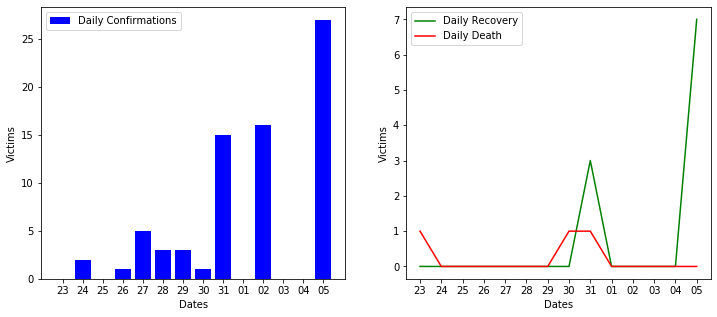

In [38]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
# plt.plot(westbengal_conf_date_list_splitted[-14:], westbengal_conf_list[-14:], color='blue', label="Daily Confirmations")
# plt.scatter(westbengal_conf_date_list_splitted[-14:], westbengal_conf_list[-14:], color='black')
plt.bar(westbengal_conf_date_list_splitted[-14:], westbengal_conf_list[-14:], color='blue', label="Daily Confirmations")
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Victims')

plt.subplot(1,2,2)
plt.plot(westbengal_conf_date_list_splitted[-14:], westbengal_rec_list[-14:], color='green', label="Daily Recovery")
plt.plot(westbengal_conf_date_list_splitted[-14:], westbengal_death_list[-14:], color='red', label="Daily Death")
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Victims')

plt.savefig('westbengal.png')

# HTML

In [39]:
state_intro = """
<!DOCTYPE html>
<html lang="en" align="center">
<html>
   <h1>
      <title>Insights of Covid'19 in India</title>
   </h1>
   <body>
       <h1><u>Insights of Covid'19 in India</u></h1>
       <h3>
"""

v = open("state_intro.html","w")
v.write(state_intro)
v.close()

In [40]:
state_body = """
    </h3>
    <body>
       <br>Get the live information about the Novel Corona Virus spread in India. <br />
       <br>Click <a href="https://telegra.ph/Data-Sources-for-Covidtracker-indiaml-04-05"> here</a> to get the list of the data source.
   </body>
   <h3>
   </h3>
"""

f = open("state_body.html","w")
f.write(state_body)
f.close()

In [41]:
icmr_intro = """
   <h2>
      Data From Indian Council of Medical Research(ICMR)
   </h2>
"""

l = open("icmr_intro.html","w")
l.write(icmr_intro)
l.close()

In [42]:
state_stat_intro = """
   <h2>
      Analysing the trend of Covid'19 in India using the data of last 14 days
  </h2>
"""

o = open("state_stat_intro.html","w")
o.write(state_stat_intro)
o.close()

In [43]:
state_stat = """
    <body>
      <br><img src="plot1.png" alt="Different Scale"/>
      <br><img src="plot2.png" alt="Normalized Scale"/>
   </body>
"""

g = open("state_stat.html","w")
g.write(state_stat)
g.close()

In [44]:
wb_intro = """
    <h1>
        <u>Effects of Covid'19 in West Bengal</u>
    </h1>
"""
h = open("wb_intro.html","w")
h.write(wb_intro)
h.close()

In [45]:
wb_stat = """
    <h2>
        <br>Analysing the trend of Covid'19 in West Bengal using the data of last 14 days
        <br><img src="westbengal.png" alt="West Bengal">
    </h2>
"""

q = open("wb_stat.html","w")
q.write(wb_stat)
q.close()

In [46]:
end = """
    <p>
        Made by <a href="https://github.com/sudo-rajarshi">Rajarshi Bhadra</a>
    </p>
</html> 
"""
e = open("end.html","w")
e.write(end)
e.close()

In [47]:
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y at %H:%M:%S")

with open('state_intro.html') as fp: 
    data1 = fp.read()

with open('state_body.html') as fp: 
    data2 = fp.read() 
    data2 = data2[:103] + '<br>Last updated on ' + str(dt_string) + data2[103:]
    
with open('total_data.html') as fp: 
    data3 = fp.read() 
    data3 = data3[:35] + str(' align="center"') + data3[35:]
    
with open('State_data.html') as fp: 
    data4 = fp.read() 
    data4 = data4[:35] + str(' align="center"') + data4[35:]
  
with open('icmr_intro.html') as fp:
    data5 = fp.read()
    
with open('ICMR_report_data.html') as fp:
    data6 = fp.read()
    data6 = data6[:35] + str(' align="center"') + data6[35:]
        
with open('state_stat_intro.html') as fp: 
    data7 = fp.read() 
    
with open('daily_data.html') as fp: 
    data8 = fp.read() 
    data8 = data8[:35] + str(' align="center"') + data8[35:]

with open('state_stat.html') as fp:
    data9 = fp.read()

with open('wb_intro.html') as fp:
    data10 = fp.read()
    
with open('wb_data.html') as fp:
    data11 = fp.read()
    data11 = data11[:35] + str(' align="center"') + data11[35:]
    
with open('wb_data_daily.html') as fp:
    data12 = fp.read()
    data12 = '\n<br>' + data12
    data12 = data12[:35] + str('" align="center"') + data12[35:]

with open('wb_stat.html') as fp:
    data13 = fp.read()
    
with open('end.html') as fp:
    end_data = fp.read()

    
data = data1 + data2 + data3 + data4 + data7 + data8 + data9 + data10 + data11 + data13 + end_data
  
with open ('index.html', 'w') as fp: 
    fp.write(data) 